## Introduction to Conjugate Gradient Methods
The conjugate gradient methods are frequently used for solving large linear systems of equations and also for solving nonlinear optimization problems. This let us characterize the conjugate gradient methods into two classes:

**Linear Conjugate Gradient Method:** This is an iterative method to solve large linear systems where the coefficient matrices are positive definite. This can be treated as a replacement of the Gaussian elimination method in numerical analysis.

**Nonlinear Conjugate Gradient method:** This is used for solving nonlinear optimization problems. We will study five methods under this class:

* Polak-Ribiere algorithm,
* Fletcher-Reeves algorithm,
* Hestenes-Stiefel algorithm,
* Dai-Yuan algorithm, and
* Hager-Zhang algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Example 1 :
Let us consider an objective function given by:

\begin{equation}
    f(x_1, x_2) = \frac{x_1^2}{2} + x_1x_2 + x_2^2-2x_2 \tag{5.36}
\end{equation}
  
Finding the minimizer of this objective function is equivalent to finding the solution to the equation given by  
$\mathbb{A} x = b$
 , where  $\mathbb{A} = \begin{bmatrix} \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & 1\end{bmatrix}$ and $\mathbb{x} = \begin{bmatrix}x_1 \\ x_2\end{bmatrix}$  and $\mathbb{b} = \begin{bmatrix}0 \\2\end{bmatrix}$. So, we use the linear conjugate gradient algorithm to solve
\begin{equation}
    \begin{bmatrix} \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & 1\end{bmatrix} \begin{bmatrix}x_1 \\ x_2\end{bmatrix} = \begin{bmatrix}0 \\2\end{bmatrix} \tag{5.37}
\end{equation}
  
where, we will consider the starting iterate to be 
$\begin{bmatrix}-2.3 \\ 2.2 \end{bmatrix}$ tolerance $ϵ = 10^-5$. As usual, let us first define the objective function in Python.

In [2]:
def f(x): # Define the objective function
    return x[0]**2/2 + x[0]*x[1] + x[1]**2 - 2*x[1]

Next we define the matrix $\mathbb{A}$ and the vector $\mathbb{b}$

In [3]:
A = np.array(([1/2, 1/2], [1/2, 1]), dtype=float)
b = np.array([0., 2.])

We can make sure that $\mathbb{A}$ is actually a symmetric positive definite matrix

In [4]:
eigs = np.linalg.eigvals(A)
print("The eigenvalues of A:", eigs)

The eigenvalues of A: [0.19098301 1.30901699]


In [5]:
if (np.all(eigs>0)):
    print("A is positive definite")
elif (np.all(eigs>=0)):
    print("A is positive semi-definite")
else:
    print("A is negative definite")

A is positive definite


We see that $\mathbb{A}$ is indeed positive definite. To check whether it is symmetric, we can check whether $\mathbb{A}^T$ equals to $\mathbb{A}$. 


In [6]:
if (A.T==A).all()==True: print("A is symmetric")

A is symmetric


### Defining the iteration print format

In [7]:
def print_head():
    print("   Iter  	 Current Solution                        f(x)                norm(Df)")
    print("========================================================================================  ")

In [8]:
def print_iter(iter,x):
    f = func(x)
    normdf=np.linalg.norm(Df(x))
    print("{0:6d}    {1}  \t{2:7.6f}\t {3:9.8e}".format(iter,np.array_str(x, precision=15),f,normdf))

### Example 2 
Let us consider an objective function having the form,

\begin{equation}
    f(x_1, x_2) = x_1^4 - 2x_1^2x_2+x_1^2 + x_2^2-2x_1+1 \tag{5.42}
\end{equation}
 
The function has a local minimizer at $f(1,1)=0$. We will implement the Fletcher-Reeves algorithm in Python to figure out the minimizer. Let the starting iterate be given by  $\mathbb{x}_j = \begin{bmatrix}2 \\ -1.8 \end{bmatrix}$, the tolerance be $\epsilon=10^-5$ and the constants to be used for determining the step length using the strong Wolfe conditions be $\alpha_1 = 10^-4$ and $\alpha_2 = 0.38$ . Let us first define the objective function and its gradient in Python.

In [9]:
import autograd.numpy as np
from autograd import grad
from scipy.optimize import line_search
NORM=np.linalg.norm

In [10]:
#import autograd as ad
#from autograd.variable import Variable
def func(x): # Objective function
    return x[0]**4 - 2*x[0]**2*x[1] + x[0]**2 + x[1]**2 - 2*x[0] + 1
''' def grad(x): # Objective function
    #grad = np.empty(shape=(2))
    #grad=np.array([4*x[0]**3 - 4*x[0]*x[1] + 2*x[0] - 2, -2*x[0]**2 + 2*x[1]])
    return [4*x[0]**3 - 4*x[0]*x[1] + 2*x[0] - 2, -2*x[0]**2 + 2*x[1]]
def Df(x): # Objective function
    grad1 = np.empty(shape=(2))
    grad1=np.array([4*x[0]**3 - 4*x[0]*x[1] + 2*x[0] - 2, -2*x[0]**2 + 2*x[1]])
    return grad1
'''
Df = grad(func) # Gradient of the objective function

#Df

## Feltcher-Reeves Algorithm <br>
The first application of the Conjugate Gradient Method on nonlinear objective functions was introduced by Fletcher and Reeves. The directions $\delta_j$
given by Fletcher and Reeves are mutually conjugate with respect to the symmetric positive definite matrix $\mathbb{A}$ in Eq. (5.1), where the residual is given by Eq. (5.5). The descent direction is given by,

\begin{equation}
    \mathbb{\delta}_{j+1} =
    \begin{cases}
    -\nabla f(\mathbb{x}_j),\ \ j=0 \\
    -\nabla f(\mathbb{x}_j) + \chi_j\mathbb{\delta}_j,\ \ j=1, 2, \ldots, n-1 \tag{5.39}
    \end{cases}
\end{equation}

In the above equation,
\begin{equation}
    \mathbb{x}_j = \mathbb{x}_{j-1}+\beta_j\mathbb{\delta}_j \tag{5.40}
\end{equation}
 

where $\beta_j$ is the $j-th$ step length. $\chi_j$ in Eq. (5.39) is given by,
\begin{equation}
    \chi_j = \frac{\|\nabla f(\mathbb{x}_j)\|^2}{\|\nabla f(\mathbb{x}_{j-1})\|^2} \tag{5.41}
\end{equation}
 

The Fletcher-Reeves Algorithm is given below:

In [11]:
from scipy.optimize import line_search
NORM = np.linalg.norm

def Fletcher_Reeves(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    D = Df(Xj)
    delta = -D # Initialize the descent direction
    print_head()
    iter=0
    while True:
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta #Newly updated experimental point
        
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            print_iter(iter, X)
            print("========================================================================================  ")
            data = {
            'x1': x1,
            'x2': x2,
            'f1':func(x1),
            'f2':func(x2)}
            df = pd.DataFrame(data, columns = ['x1', 'x2', 'f1','f2'])
            return df
            #return X, func(X) # Return the results
        else:
            Xj = X
            d = D # Gradient at the preceding experimental point
            D = Df(Xj) # Gradient at the current experimental point
            chi = np.dot(D,D)/np.dot(d,d) # Line (16) of the Fletcher-Reeves algorithm
            delta = -D + chi*delta # Newly updated descent direction
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]
            print_iter(iter,Xj)
            iter += 1

In [12]:
results_f = Fletcher_Reeves(np.array([2., -1.8]), 10**-5, 10**-4, 0.38)

   Iter  	 Current Solution                        f(x)                norm(Df)
     0    [-0.980320057972532 -1.085708415857823]  	8.110795	 1.26661695e+01
     1    [1.089660748938067 0.047227693569537]  	1.307942	 5.63109892e+00
     2    [0.642619089958989 0.473047185397644]  	0.131332	 8.77484606e-01
     3    [0.766371433709727 0.466510406843358]  	0.069179	 2.60335691e-01
     4    [0.932516917957688 0.704482357557566]  	0.031814	 5.83346214e-01
     5    [1.014900250649819 1.06007930766391 ]  	0.001125	 1.10080945e-01
     6    [1.023571919177161 1.059598853198843]  	0.000697	 2.38508612e-02
     7    [1.024886346856986 1.054727712647938]  	0.000638	 3.31524754e-02
     8    [1.005437611037475 0.999548723927884]  	0.000159	 6.09372287e-02
     9    [0.996075105562441 0.987011250105127]  	0.000042	 1.63469768e-02
    10    [0.994792257477952 0.986923318806105]  	0.000034	 5.38401229e-03
    11    [0.994465817655026 0.98757521774787 ]  	0.000033	 6.20547793e-03
    12    [0.99560

<a list of 156 text.Text objects>

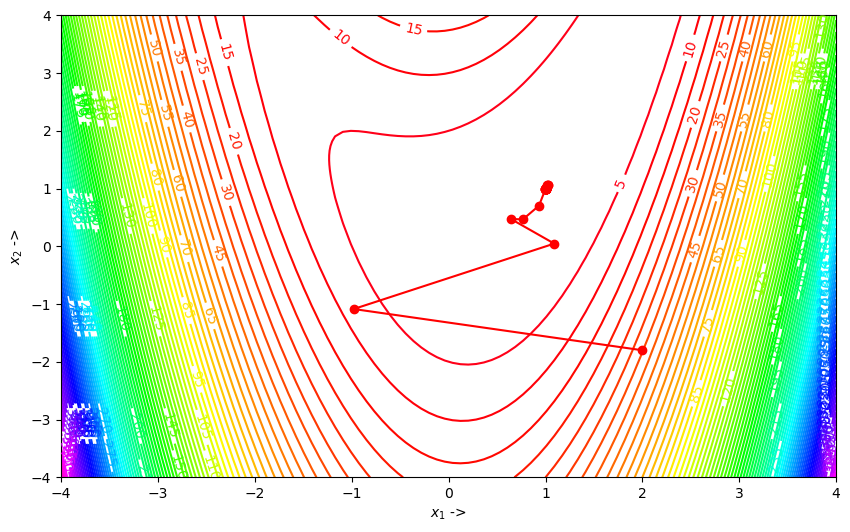

In [13]:
x1 = np.linspace(-4, 4, 100)
x2 = np.linspace(-4, 4, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
plt.figure(figsize=(10, 6))
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.gist_rainbow)
plt.plot(results_f['x1'],results_f['x2'],'ro-')
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")
plt.clabel(contours, inline=1, fontsize=10)

One of the variants of the Fletcher-Reeves algorithm is the Polak-Ribiere algorithm, where, the $\chi_j$ in Eq. (5.39) is given by:
\begin{equation}
    \chi_j = \frac{[\nabla f(\mathbb{x}_j) - \nabla f(\mathbb{x}_{j-1})]^T\nabla f(\mathbb{x}_j)}{\|\nabla f(\mathbb{x}_{j-1})\|^2} \tag{5.43}
\end{equation}

One important characteristic to notice here is that, the strong Wolfe conditions do not guarantee the direction $\delta_j$ will always be a descent direction in the Polak-RIbiere algorithm. Then, $\chi$ needs to modified in the following way:
\begin{equation}
    \chi_j = \max\{0, \chi_j\} \tag{5.44}
\end{equation}

This ensures that the strong wolfe conditions guarantee a descent direction . The Polak-Ribiere algorithm reduces back to the Fletcher-Reeves algorithm if the objective function is strongly convex quadratic, and the line search is exact. The Polak-Ribiere Algorithm is given below:

The polak-Ribiere algorithm is most often considered as more coherent than the Fletcher-Reeves algorithm.

Example 5.3 Let us again consider an objective function given in Eq. (5.42). We will implement the Polak-Ribiere algorithm in Python to figure out the minimizer. Let the starting iterate be given by $\mathbb{x}_j = \begin{bmatrix}-1.7 \\ -3.2 \end{bmatrix}$, the tolerance be $\epsilon = 10^-6$ and the constants to be used for determining the step length using the strong Wolfe conditions be $\alpha_1 = 10^-4$ and $\alpha_2 = 0.2$. We define the function ```Polak_Ribiere()``` in Python:

In [14]:
def Polak_Ribiere(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    D = Df(Xj)
    delta = -D # Initialize the descent direction
    #print("Initial direction \n", delta)
    print_head()
    iter = 0
    while True:
        start_point = Xj # Start point for step length selection 
        #print("iteration {}, Current Solution (Xj) = {}".format(iter,Xj))
        beta = line_search(func, Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        #print ("Stepsize (Beta) = ", beta)
        if beta!=None:
            X = Xj+ beta*delta # Newly updated experimental point 
        
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            print_iter(iter,X)
            print("========================================================================================  ")
            data = {
            'x1': x1,
            'x2': x2,
            'f1':func(x1),
            'f2':func(x2)}
            df = pd.DataFrame(data, columns = ['x1', 'x2', 'f1','f2'])
            return df
            #return X, func(X) # Return the results
        else:
            Xj = X
            d = D # Gradient of the preceding experimental point
            D = Df(Xj) # Gradient of the current experimental point
            chi = np.dot((D-d),D)/np.dot(d,d)
            #print("chi = ", chi)
            chi = max(0, chi) # Line (16) of the Polak-Ribiere Algorithm
            delta = -D + chi*delta # Newly updated direction
            #print("Delta = ", delta)
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]
            print_iter(iter, Xj)
            iter += 1

In [15]:
results_PR = Polak_Ribiere(np.array([-1.7, -3.2]), 10**-6, 10**-4, 0.2)

   Iter  	 Current Solution                        f(x)                norm(Df)
     0    [ 0.444051813060617 -2.642139812802736]  	8.370827	 6.90668739e+00
     1    [0.160431182084743 0.084541424542446]  	0.708334	 1.72089648e+00
     2    [0.813837114310654 0.626714818581024]  	0.035925	 2.66094613e-01
     3    [0.851656881565293 0.637222449789069]  	0.029767	 1.76227321e-01
     4    [0.985178385055283 1.028611792760657]  	0.003588	 2.83220707e-01
     5    [1.016091513693025 1.062585265863747]  	0.001168	 1.08600428e-01
     6    [1.023795995407899 1.057443285846116]  	0.000652	 2.08900768e-02
     7    [0.999780019752771 1.000208194682008]  	0.000000	 3.29728465e-03
     8    [1.000015066742188 1.000036125725801]  	0.000000	 1.34768313e-05
     9    [0.999999846011394 1.000000112720088]  	0.000000	 2.16127146e-06
    10    [0.999999999798927 0.999999999517276]  	0.000000	 1.79846722e-10


<a list of 156 text.Text objects>

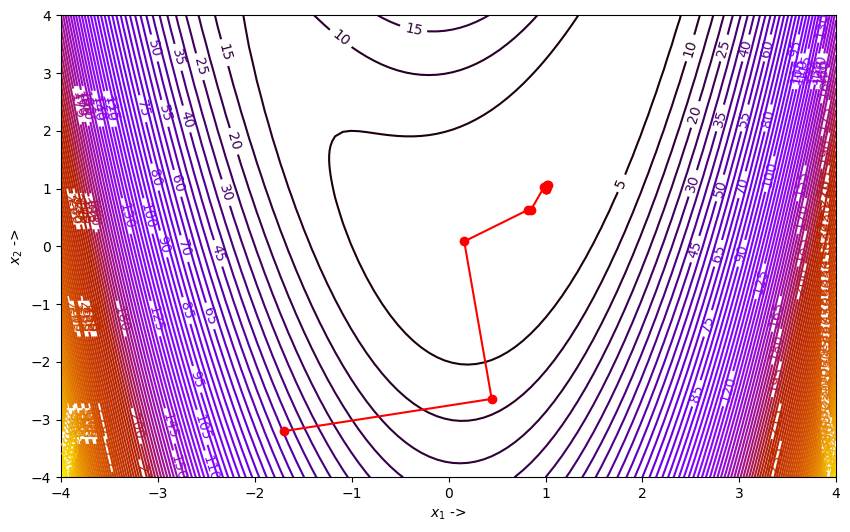

In [16]:
x1 = np.linspace(-4, 4, 100)
x2 = np.linspace(-4, 4, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
plt.figure(figsize=(10, 6))
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.gnuplot)
plt.plot(results_PR['x1'],results_PR['x2'],'ro-')
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")
plt.clabel(contours, inline=1, fontsize=10)

### Hestenes-Stiefel Algorithm

In this variant, Eq. (5.39) changes to:
\begin{equation}
    \chi_j = \frac{\nabla f(\mathbb{x}_j)^T[\nabla(\mathbb{x}_j) - \nabla f(\mathbb{x}_{j-1})]}{\mathbb{\delta}_j^T[\nabla(\mathbb{x}_j) - \nabla f(\mathbb{x}_{j-1})]} \tag{5.45}
\end{equation}

The Python implementation is given by the Python function ```Hestenes_Stiefel()```.

In [17]:
def Hestenes_Stiefel(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    D = Df(Xj)
    delta = -D
    iter=0
    print_head()
    while True:
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            print_iter(iter,X)
            print("========================================================================================  ")
            data = {
            'x1': x1,
            'x2': x2,
            'f1':func(x1),
            'f2':func(x2)}
            df = pd.DataFrame(data, columns = ['x1', 'x2', 'f1','f2'])
            return df
            #return X, func(X)
        else:
            Xj = X
            d = D
            D = Df(Xj)
            chi = np.dot(D,(D - d))/np.dot(delta,(D - d)) # See line (16)
            delta = -D + chi*delta
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]
            print_iter(iter, Xj)
            iter += 1
            

In [18]:
results_HS = Hestenes_Stiefel(np.array([-1.7, 2]), 10**-5, 10**-4, 0.38)

   Iter  	 Current Solution                        f(x)                norm(Df)
     0    [1.61814117521798  2.515743214450576]  	0.392633	 1.91166440e+00
     1    [1.604862324843827 2.628338975159012]  	0.368642	 8.77427929e-01
     2    [1.222855904233699 1.362859014458869]  	0.067226	 1.12556007e+00
     3    [1.101413985321432 1.289822693790301]  	0.016169	 2.04444744e-01
     4    [1.000934567381555 0.994705360355754]  	0.000052	 3.37476927e-02
     5    [0.996812438443929 0.990633976639641]  	0.000019	 8.20262960e-03
     6    [0.99990977583149  0.999919342506276]  	0.000000	 6.12940943e-04
     7    [1.000004523343379 1.000013612008718]  	0.000000	 1.29721547e-05
     8    [0.999999967438902 0.999999967641774]  	0.000000	 2.06832651e-07


<a list of 156 text.Text objects>

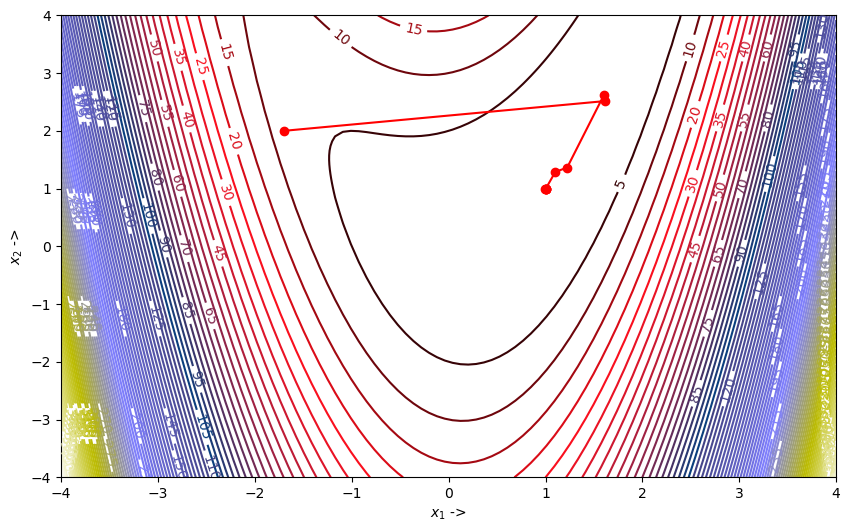

In [19]:
x1 = np.linspace(-4, 4, 100)
x2 = np.linspace(-4, 4, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
plt.figure(figsize=(10, 6))
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.gist_stern)
plt.plot(results_HS['x1'],results_HS['x2'],'ro-')
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")
plt.clabel(contours, inline=1, fontsize=10)

### Dai-Yuan Algorithm
In this variant, Eq. (5.39) changes to:
\begin{equation}
    \chi_j = \frac{\|\nabla f(\mathbb{x}_j)\|^2}{\mathbb{\delta}_j^T[\nabla f(\mathbb{x}_j) - \nabla f(\mathbb{x}_{j-1})]} \tag{5.46}
\end{equation}
 

The Dai-Yuan algorithm [ref, Dai-Yuan, A nonlinear conjugate gradient method with a strong global convergence property] is given below:

In [20]:
def Dai_Yuan(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    D = Df(Xj)
    delta = -D
    print_head()
    iter=0
    while True:
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            print_iter(iter,X)
            print("========================================================================================  ")
            data = {
            'x1': x1,
            'x2': x2,
            'f1':func(x1),
            'f2':func(x2)}
            df = pd.DataFrame(data, columns = ['x1', 'x2', 'f1','f2'])
            return df
            #return X, func(X)
        else:
            Xj = X
            d = D
            D = Df(Xj)
            chi = NORM(D)**2/delta.dot(D - d) # See line (16)
            delta = -D + chi*delta
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]
            print_iter(iter, Xj)
            iter+=1

In [21]:
results_DY = Dai_Yuan(np.array([-1.7, -2.2]), 10**-6, 10**-4, 0.2)

   Iter  	 Current Solution                        f(x)                norm(Df)
     0    [ 0.810971694784301 -1.561149358869735]  	4.958914	 8.13628345e+00
     1    [-0.150494841787976 -0.716559075041718]  	1.870067	 3.11867039e+00
     2    [0.648719527313979 0.178847708318079]  	0.181957	 4.89698561e-01
     3    [0.786696321810073 0.733799531564248]  	0.058702	 8.21020252e-01
     4    [0.985005322295349 0.918818462909528]  	0.002869	 2.00907461e-01
     5    [0.971675107211646 0.938201675089938]  	0.000838	 3.55708366e-02
     6    [0.978539233463539 0.942198206971187]  	0.000696	 3.51372232e-02
     7    [0.992504477654233 0.9909815913994  ]  	0.000091	 4.02577606e-02
     8    [0.998505284758027 0.996250505197478]  	0.000003	 1.52559616e-03
     9    [0.998521584555758 0.997075754892377]  	0.000002	 3.07885178e-03
    10    [0.999993886396169 0.99990949413704 ]  	0.000000	 3.39178992e-04
    11    [0.99997030469937  0.999930314023313]  	0.000000	 2.74870706e-05
    12    [0.999

<a list of 156 text.Text objects>

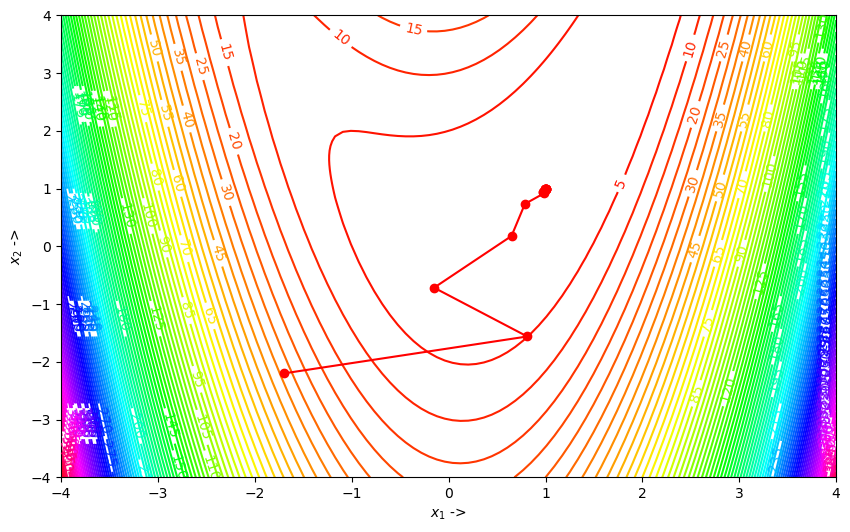

In [22]:
x1 = np.linspace(-4, 4, 100)
x2 = np.linspace(-4, 4, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
plt.figure(figsize=(10, 6))
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.hsv)
plt.plot(results_DY['x1'],results_DY['x2'],'ro-')
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")
plt.clabel(contours, inline=1, fontsize=10)

### Hager-Zhang Algorithm
In this variant, Eq. (5.39) changes to:
\begin{equation}
    \chi_j = \mathbb{M}_j^T\mathbb{N}_j \tag{5.47}
\end{equation}

where,

\begin{equation}
    \mathbb{M}_j = \mathbb{Q}_j - 2\delta_j\frac{\|\mathbb{Q}_j\|^2}{\mathbb{\delta}_j^T\mathbb{Q}_j} \tag{5.48}
\end{equation}
 
and
\begin{equation}
    \mathbb{N}_j = \frac{\nabla f(\mathbb{x}_j)}{\mathbb{\delta}_j^T\mathbb{Q}_j} \tag{5.49}
\end{equation}
 
In the equations above,  $Q_j$ is actually given by
\begin{equation}
    \mathbb{Q}_j = \nabla f(\mathbb{x}_j) - \nabla f(\mathbb{x}_{j-1}) \tag{5.50}
\end{equation}

The Hager-Zhang algorithm is given below:

In [35]:
def Hager_Zhang(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    D = Df(Xj)
    delta = -D
    print_head()
    iter=0
    while True:
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            print_iter(iter,X)
            print("========================================================================================  ")
            data = {
            'x1': x1,
            'x2': x2,
            'f1':func(x1),
            'f2':func(x2)}
            df = pd.DataFrame(data, columns = ['x1', 'x2', 'f1','f2'])
            return df
            #return X, func(X)
        else:
            Xj = X
            d = D
            D = Df(Xj)
            Q = D - d
            M = Q - 2*delta*NORM(Q)**2/(delta.dot(Q))
            N = D/(delta.dot(Q))
            chi = M.dot(N) # See line (19)
            delta = -D + chi*delta
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]
            print_iter(iter, Xj)
            iter+=1

In [43]:
results_HZ = Hager_Zhang(np.array([-1.7, -2.2]), 10**-6, 10**-4, 0.2)

   Iter  	 Current Solution                        f(x)                norm(Df)
     0    [ 0.810971694784301 -1.561149358869735]  	4.958914	 8.13628345e+00
     1    [ 0.072288964537396 -1.355935594463199]  	2.713408	 3.08998378e+00
     2    [ 0.674331635586913 -0.546585466340005]  	1.108679	 2.86548536e+00
     3    [0.686740635253017 0.476470561741477]  	0.098155	 6.39936851e-01
     4    [0.95464823320367  0.829955401681302]  	0.008682	 2.73780946e-01
     5    [0.978539869445263 0.966450942964254]  	0.000540	 7.98131178e-02
     6    [0.995170843985587 0.986777448262473]  	0.000036	 8.53528385e-03
     7    [0.998397007887684 0.992144904763221]  	0.000024	 1.79671216e-02
     8    [1.000011111397795 1.000045383385865]  	0.000000	 8.42889051e-05
     9    [1.000011726948121 1.000023770024099]  	0.000000	 2.21989178e-05
    10    [1.000000000004871 0.999999999838168]  	0.000000	 7.76030263e-10


<a list of 156 text.Text objects>

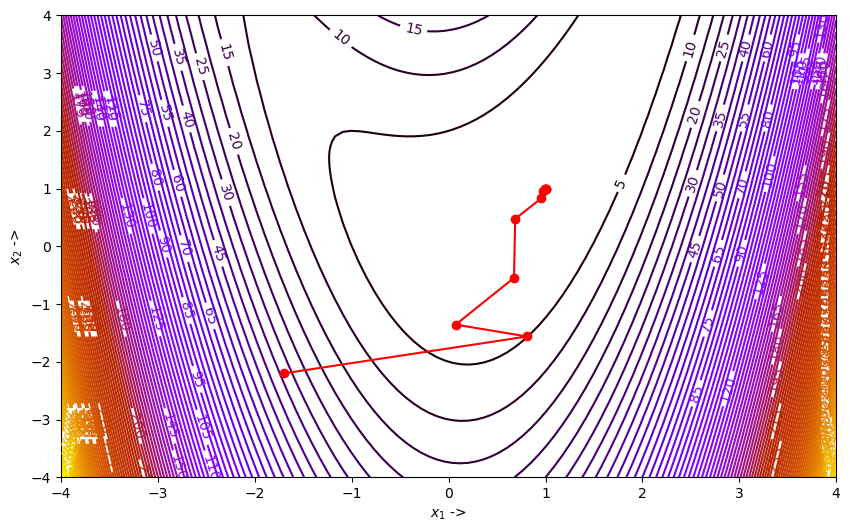

In [44]:
x1 = np.linspace(-4, 4, 100)
x2 = np.linspace(-4, 4, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
plt.figure(figsize=(10, 6))
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.gnuplot)
plt.plot(results_HZ['x1'],results_HZ['x2'],'ro-')
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")
plt.clabel(contours, inline=1, fontsize=10)